# Модуль Б. Разработка модели машинного обучения

## Импортирование библиотек

In [33]:
# библиотека с предобученной моделью YOLO
from ultralytics import YOLO

# библиотеки для работы с изображениями
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# библиотека для обучения на видеокарте
import torch

# библиотека для модели распознавания
from deepface import DeepFace

# библиотека для работы с файлами
import os

# библиотека для работы с датафреймами
import pandas as pd

#
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


**Основная задача нейронной сети - `определение и распознавание человеческих лиц на фотографии`. Для того чтобы решить эту задачу, нужно реализовать 2 модели:**
- Модель детекции лица
- Модель распознавания лица

## Модель детекции

Существуют несльколько различных предобученных моделей детекции, такие как:
- `EfficientNet`
- `ResNet`
- `YOLO`
- и многие другие

**В качестве модели для своей задачи, я буду использовать предобученную модель `YOLOv8n` (где n - nano) - это легкая и достаточно точная модель, которая способна решать задачи `детекции`, а так же в качестве улучшенной версии можно использовать `YOLOv8s` (где s - small), как более мощную модель**

Для начала, надо загрузить сам предобученную модель в формате `.pt`

**Структура модели `YOLOv8n` (3.2M):**

- task=detect 
- mode=train 
- model=yolov8n.pt 
- data=D:\Helper\MLBazyak\homework\06_01\06_01_hw\data.yaml 
- epochs=3 
- time=None 
- patience=100 
- batch=8 
- imgsz=640 
- save=True 
- save_period=-1 
- cache=False 
- device=None 
- workers=8 
- project=None 
- name=price_detection_v3 
- exist_ok=False 
- pretrained=True 
- optimizer=auto 
- verbose=True 
- seed=0 
- deterministic=True 
- single_cls=False 
- rect=False 
- cos_lr=True 
- close_mosaic=10 
- resume=False 
- amp=True 
- fraction=1.0 
- profile=False 
- freeze=None 
- multi_scale=False 
- overlap_mask=True 
- mask_ratio=4 
- dropout=0.0 
- val=True 
- split=val 
- save_json=False 
- save_hybrid=False 
- conf=None  
- iou=0.7 
- max_det=300 
- half=False 
- dnn=False 
- plots=True 
- source=None 
- vid_stride=1 
- stream_buffer=False 
- visualize=False 
- augment=False 
- agnostic_nms=False 
- classes=None 
- retina_masks=False 
- embed=None 
- show=False 
- save_frames=False 
- save_txt=False 
- save_conf=False 
- save_crop=False 
- show_labels=True 
- show_conf=True 
- show_boxes=True 
- line_width=None 
- format=torchscript 
- keras=False 
- optimize=False 
- int8=False 
- dynamic=False 
- simplify=True 
- opset=None 
- workspace=None 
- nms=False 
- lr0=0.01 
- lrf=0.01 
- momentum=0.937 
- weight_decay=0.0005 
- warmup_epochs=3.0 
- warmup_momentum=0.8 
- warmup_bias_lr=0.1 
- box=7.5 
- cls=0.5 
- dfl=1.5 
- pose=12.0 
- kobj=1.0 
- nbs=64 
- hsv_h=0.015 
- hsv_s=0.7 
- hsv_v=0.4 
- degrees=0.0 
- translate=0.1 
- scale=0.5 
- shear=0.0 
- perspective=0.0 
- flipud=0.0 
- fliplr=0.5 
- bgr=0.0 
- mosaic=1.0 
- mixup=0.0 
- copy_paste=0.0 
- copy_paste_mode=flip 
- auto_augment=randaugment 
- erasing=0.4 
- crop_fraction=1.0 
- cfg=None 
- tracker=botsort.yaml 
- save_dir=runs\detect\price_detection_v3

In [3]:
# инициализируем модель YOLOv8 nano
model = YOLO('yolov8n.pt') 

100%|██████████| 6.25M/6.25M [00:00<00:00, 6.65MB/s]


*Для начала, попробую обучить модель на 3х эпохах*

In [6]:
# тестовое обучение 1
results_test = model.train(
    data = r'C:\Users\user1\Project\face_recognition\Module_2\data.yaml',  # путь к yaml файлу
    epochs=2,                                                                   # количество эпох
    imgsz=640,                                                                 # размер изображений в данных
    batch=-1,  
    device=device,                                                              # количество батчей
    cos_lr=True,                                                                # косинусный планировщик кривой скорости обучении
    lr0=0.01,                                                                   # скорость обучения
    name='face_detection_v1'                                                    # название эксперимента
)

New https://pypi.org/project/ultralytics/8.3.65 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\user1\Project\face_recognition\Module_2\data.yaml, epochs=2, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=face_detection_v1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|██████████| 5.35M/5.35M [00:01<00:00, 5.35MB/s]


AMP: checks passed 


train: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\train\labels... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:02<00:00, 310.96it/s]

train: New cache created: C:\Users\user1\Project\some_data\face_rec_data\face_det\train\labels.cache



c:\Users\user1\Project\face_recognition\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.10G reserved, 0.06G allocated, 7.84G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


c:\Users\user1\Project\face_recognition\.venv\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


     3011043       8.194         0.281         81.13         89.48        (1, 3, 640, 640)                    list
     3011043       16.39         0.409         31.18         56.17        (2, 3, 640, 640)                    list
     3011043       32.78         0.661         61.53         58.74        (4, 3, 640, 640)                    list
     3011043       65.55         1.166         30.69         49.96        (8, 3, 640, 640)                    list
     3011043       131.1         2.194         33.42         55.19       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 50 for CUDA:0 4.88G/8.00G (61%) 


train: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\train\labels.cache... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\valid\labels... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<00:00, 201.61it/s]

val: New cache created: C:\Users\user1\Project\some_data\face_rec_data\face_det\valid\labels.cache


Plotting labels to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000390625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      6.32G      1.263      2.396      1.683        110        640: 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]


                   all        170        210          1     0.0181      0.749      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      6.33G     0.8316      1.143      1.246        111        640: 100%|██████████| 16/16 [00:06<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        170        210      0.982      0.763      0.912      0.715



2 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1\weights\last.pt, 6.2MB
Optimizer stripped from c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1\weights\best.pt, 6.2MB

Validating c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1\weights\best.pt...
Ultralytics 8.3.58  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]


                   all        170        210      0.982      0.763      0.912      0.715
Speed: 0.5ms preprocess, 2.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v1


In [7]:
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:06<00:00, 7.81MB/s]


In [8]:
# тестовое обучение 2
results_test = model.train(
    data = r'C:\Users\user1\Project\face_recognition\Module_2\data.yaml',  # путь к yaml файлу
    epochs=20,                                                                   # количество эпох
    imgsz=640,                                                                 # размер изображений в данных
    batch=-1,  
    device=device,                                                              # количество батчей
    cos_lr=True,                                                                # косинусный планировщик кривой скорости обучении
    lr0=0.01,                                                                   # скорость обучения
    name='face_detection_v2'                                                    # название эксперимента
)

New https://pypi.org/project/ultralytics/8.3.65 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:\Users\user1\Project\face_recognition\Module_2\data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=face_detection_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

train: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\train\labels.cache... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 2080 SUPER) 8.00G total, 0.81G reserved, 0.23G allocated, 6.97G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    25856899       79.07         1.046          77.6         45.34        (1, 3, 640, 640)                    list
    25856899       158.1         1.380          26.6         36.54        (2, 3, 640, 640)                    list
    25856899       316.3         2.210         46.48         47.09        (4, 3, 640, 640)                    list
    25856899       632.5         3.748         54.57         60.43        (8, 3, 640, 640)                    list
    25856899        1265         6.679           119         109.4       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 9 for CUDA:0 5.20G/8.00G (65%) 


train: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\train\labels.cache... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\user1\Project\some_data\face_rec_data\face_det\valid\labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<?, ?it/s]


Plotting labels to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0004921875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.1G       1.09      1.194      1.487         27        640: 100%|██████████| 88/88 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        170        210    0.00915      0.724    0.00816    0.00555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.08G      1.119      1.004      1.451         25        640: 100%|██████████| 88/88 [00:18<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        170        210     0.0459     0.0143    0.00104   0.000414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.13G      1.146     0.9673      1.458         24        640: 100%|██████████| 88/88 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]

                   all        170        210      0.347      0.429       0.32      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.12G      1.131     0.9666       1.45         23        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]

                   all        170        210      0.886      0.767      0.861      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.98G       1.08     0.8555      1.417         23        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

                   all        170        210       0.86      0.533      0.645       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.08G      1.022     0.7814      1.367         25        640: 100%|██████████| 88/88 [00:18<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.68it/s]

                   all        170        210      0.975      0.852       0.91      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.13G      1.015     0.7925       1.36         18        640: 100%|██████████| 88/88 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        170        210      0.965      0.871      0.925      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       4.1G     0.9599     0.7231      1.305         32        640: 100%|██████████| 88/88 [00:18<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.64it/s]

                   all        170        210      0.989       0.88      0.917      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.11G     0.9151     0.6734      1.286         23        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        170        210      0.948      0.876      0.925      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.98G      0.898     0.6165      1.289         22        640: 100%|██████████| 88/88 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        170        210      0.987      0.862      0.927      0.719


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.99G     0.8455     0.5734      1.367          9        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        170        210       0.93       0.88      0.929       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.98G     0.7842     0.5395      1.313         11        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        170        210      0.959      0.867      0.917      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.08G      0.776     0.5079      1.295          9        640: 100%|██████████| 88/88 [00:18<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.56it/s]

                   all        170        210      0.979      0.884      0.929      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.13G      0.746     0.4904      1.273         10        640: 100%|██████████| 88/88 [00:18<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        170        210      0.969      0.893      0.931      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.12G     0.7328     0.4655      1.244          9        640: 100%|██████████| 88/88 [00:18<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]

                   all        170        210      0.974       0.89      0.936      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.98G     0.6998     0.4343      1.228         10        640: 100%|██████████| 88/88 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        170        210      0.994      0.895      0.942      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.12G      0.668     0.4057      1.199         10        640: 100%|██████████| 88/88 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.66it/s]

                   all        170        210      0.979      0.899      0.935      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.97G     0.6562     0.4012      1.203         12        640: 100%|██████████| 88/88 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.57it/s]

                   all        170        210      0.978      0.914       0.94      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.98G     0.6479     0.3895      1.172         10        640: 100%|██████████| 88/88 [00:18<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        170        210      0.986      0.905      0.942      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.08G     0.6377     0.3798      1.166          9        640: 100%|██████████| 88/88 [00:18<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.69it/s]

                   all        170        210       0.99      0.909      0.942      0.772



20 epochs completed in 0.130 hours.
Optimizer stripped from c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2\weights\last.pt, 52.0MB
Optimizer stripped from c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2\weights\best.pt, 52.0MB

Validating c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2\weights\best.pt...
Ultralytics 8.3.58  Python-3.11.9 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 8192MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


                   all        170        210      0.986      0.905      0.942      0.773
Speed: 0.2ms preprocess, 6.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to c:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2


Тестирование модели

In [10]:
model = YOLO(r'C:\Users\user1\Project\face_recognition\runs\detect\face_detection_v2\weights\best.pt')

In [5]:
# пути к фотографиям, на которых буду тестировать свою функцию
photos = [
    r'C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\04854.png',
    r'C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\09024.png',
    r'C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\04897.png',
]
# прохожусь по каждой фотографии используя цикл for
for photo in photos:
    result_fin = model(photo)
    for result in result_fin:
        img = result.plot()  
        img = Image.fromarray(img)  
        img.show()  


image 1/1 C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\04854.png: 480x640 1 face, 174.5ms
Speed: 0.0ms preprocess, 174.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\09024.png: 640x640 1 face, 18.0ms
Speed: 2.6ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\user1\Project\some_data\face_rec_data\face_det\test\images\04897.png: 640x448 1 face, 15.6ms
Speed: 1.2ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


## Модель распознавания

Эмбеддинги

In [14]:
img_paths=[
    r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\test\Aaron_Peirsol\Aaron_Peirsol_0002.jpg',
    r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\test\Ozzy_Osbourne\Ozzy_Osbourne_0001.jpg',
    r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\test\Cruz_Bustamante\Cruz_Bustamante_0002.jpg',
    ]

In [144]:
def extract_embeddings(img_path: str, 
                       det_model: YOLO, 
                       rec_model: str = 'Facenet512'):
    '''
        Процедура для выгрузки эмбеддингов из фотографии

    Args:
        - img_path (str): Путь к изображению, на котором нужно найти цену.
        - det_model (YOLO): Модель YOLO для обнаружения bounding box'ов лиц.
        - rec_model (str): Модель распознавания для выделения эмбеддингов лиц.

    Returns:
        list: Функция возвращает ембеддинг в формате списка.
    '''   

    image = cv2.imread(img_path)
    if image is None:
        print(f"Ошибка: изображение по пути {img_path} не найдено или не может быть загружено.")
        return np.nan
    
    res = det_model.predict(image, conf=0.3, iou=0.2, device=device)
    # Проверка, найдены ли bounding box'ы
    if len(res[0].boxes) == 0:
        return np.nan  # Если лицо не найдено, возвращаем np.nan
    # 
    for result in res:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1,y1,x2,y2 = map(int, box)
            #
            crop = image[y1:y2, x1:x2]

            # plt.figure(figsize=(5, 5))
            # plt.imshow(crop)
            # plt.title("Cropped Image")               # отображение обрезанной части картинки
            # plt.axis('off')
            # plt.show()

            # 
            try:
                emb_obj = DeepFace.represent(
                    img_path=crop,
                    model_name=rec_model
                )
            except Exception as e:
                print(f'Exception: {e}')
                return np.nan


    return emb_obj



In [87]:
emb = extract_embeddings(img_path=r'C:\Users\user1\Project\face_recognition\temp_image.jpg',
                         det_model=model)
emb


0: 640x512 1 face, 244.4ms
Speed: 5.0ms preprocess, 244.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)


[{'embedding': [0.0,
   0.017708877240569902,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.05306961167536702,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0187575304864733,
   0.0,
   0.03449125205289109,
   0.03699196170749231,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02134864797758777,
   0.0,
   0.030821528126927598,
   0.0,
   0.0,
   0.0,
   0.0,
   0.014085056318362238,
   0.0,
   0.0,
   0.04546626779647481,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02991093385165957,
   0.0,
   0.006419463000287048,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.05778886374565365,
   0.042194314353955785,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,

выгражужаем эмбеддинги в базу данных

In [125]:
def extract_all_emb(start_path: str, df_name: str):
    df = pd.DataFrame(columns=['name', 'img_path', 'embedding'])
    ind = 0

    for name in os.listdir(start_path):
        print(name)
        name_path = os.path.join(start_path, name)
        for img in os.listdir(name_path):
            img_path = os.path.join(name_path, img)
            embed = extract_embeddings(img_path, model)
            df.loc[ind] = [name, img_path, embed] 
            ind+=1


    print(df.shape)
    df.to_pickle(f'{df_name}.pkl')

    return df

In [126]:
train_dir = r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\train'
test_dir = r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\test'
valid_dir = r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\valid'

In [122]:
df = extract_all_emb(train_dir, 'train')

Aaron_Peirsol

0: 640x640 1 face, 298.3ms
Speed: 7.6ms preprocess, 298.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Abdoulaye_Wade

0: 640x640 1 face, 14.0ms
Speed: 3.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Abdullah

0: 640x640 1 face, 15.2ms
Speed: 0.0ms preprocess, 15.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Abdullah_al-Attiyah

0: 640x640 1 face, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Exception: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Abdullah_Gul

0: 640x640 1 face, 16.3ms
Speed: 0.0ms preprocess, 16.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 faces, 25.3ms
Speed: 0.0ms preprocess, 25.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Exception: Face could not be

In [123]:
df.shape

(1390, 3)

In [96]:
df.head()

,name,img_path,embedding
0,Aaron_Peirsol,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Abdoulaye_Wade,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Abdullah,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Abdullah_al-Attiyah,C:\Users\user1\Project\some_data\face_rec_data...,NaN
4,Abdullah_Gul,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [124]:
df.isna().sum()

name           0
img_path       0
embedding    228
dtype: int64

In [116]:
df.isna().sum()

name           0
img_path       0
embedding    228
dtype: int64

In [127]:
df1 = extract_all_emb(test_dir, 'test')
df2 = extract_all_emb(valid_dir, 'valid')

Aaron_Peirsol

0: 640x640 1 face, 295.9ms
Speed: 19.4ms preprocess, 295.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face, 14.9ms
Speed: 4.0ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Abdoulaye_Wade

0: 640x640 1 face, 15.0ms
Speed: 15.6ms preprocess, 15.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Abdullah

0: 640x640 1 face, 18.5ms
Speed: 0.0ms preprocess, 18.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Abdullah_al-Attiyah

0: 640x640 3 faces, 15.6ms
Speed: 15.6ms preprocess, 15.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Exception: Face could not be detected in numpy array.Please confirm 

In [128]:
print(df1.shape)
print(df2.shape)

(4948, 3)
(1559, 3)


In [129]:
print(df1.isna().sum())
print(df2.isna().sum())

name           0
img_path       0
embedding    832
dtype: int64
name           0
img_path       0
embedding    253
dtype: int64


In [133]:
df1[df1['embedding'].isna()]['name'].value_counts()

name
George_W_Bush                52
Colin_Powell                 25
Hugo_Chavez                  14
Gerhard_Schroeder            14
Donald_Rumsfeld              12
                             ..
Ann_Veneman                   1
Fernando_Henrique_Cardoso     1
Fernando_Vargas               1
Arlen_Specter                 1
Shimon_Peres                  1
Name: count, Length: 412, dtype: int64

In [253]:
train_df = df1.sort_values('name', ignore_index=True)
print(df1.shape)
train_df.head()

(4948, 3)


,name,img_path,embedding
0,Aaron_Peirsol,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.6655015349388123, 0.96786570..."
1,Aaron_Peirsol,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.5411179065704346, 1.95664727..."
2,Abdoulaye_Wade,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [-0.169065922498703, 0.49452060..."
3,Abdoulaye_Wade,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [0.3691116273403168, 0.56084257..."
4,Abdullah,C:\Users\user1\Project\some_data\face_rec_data...,"[{'embedding': [-0.09445210546255112, -0.35137..."


In [254]:
train_df = train_df.dropna()
train_df.shape

(4116, 3)

---------------------------------------

function coding

In [255]:
from sklearn.metrics.pairwise import cosine_similarity

In [256]:
input_path = r'C:\Users\user1\Project\some_data\face_rec_data\face_ind\test\John_Reid\John_Reid_0001.jpg'
input_embed = np.array(
    extract_embeddings(
        img_path=input_path,
        det_model=model
    )[0]['embedding']
).reshape(1,-1)


0: 640x640 1 face, 353.4ms
Speed: 8.0ms preprocess, 353.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Имя: John_Reid
Сходство: 0.7504699947249176


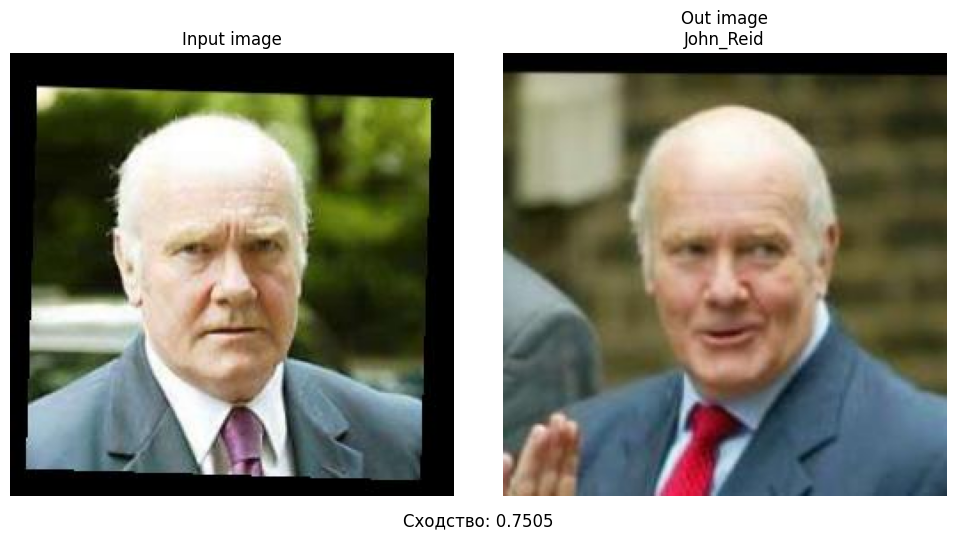

In [257]:
similar = 0
name = ''
treshold = 0.3
out_path = ''
for i in range(train_df.shape[0]):
    # Извлекаем эмбединг из списка словарей
    embedding_list = train_df["embedding"].iloc[i]  # Это список словарей
    if isinstance(embedding_list, list) and len(embedding_list) > 0:
        embedding = embedding_list[0]['embedding']  # Извлекаем эмбединг из первого словаря
        X = np.array(embedding).reshape(1, -1)
        
        # Вычисляем косинусное сходство
        cos_sim = float(cosine_similarity(X, input_embed))
        
        # Обновляем наиболее похожий результат
        if cos_sim > similar:
            similar = cos_sim
            name = train_df['name'].iloc[i]
            out_path = train_df['img_path'].iloc[i]
    else:
        print(f"Ошибка: неверный формат эмбединга в строке {i}")

if similar < treshold:
    print('Неизвестная личность')
else:
    print(f'Имя: {name}\nСходство: {similar}')

img_input = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(cv2.imread(out_path), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(img_input)
ax[0].axis('off')
ax[0].set_title('Input image')

ax[1].imshow(img_out)
ax[1].axis('off')
ax[1].set_title(f'Out image\n{name}')

fig.text(0.5, -0.03, f"Сходство: {similar:.4f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
